In [57]:
## Import modules as needed
import pandas as pd
import numpy as np
import altair as alt
import random

## enabling for altair
alt.enable_mime_rendering()

#Some basic global variables
NUMBER_OF_TRAINING = 4

We first create the training examples. To do so we need to create
1. the true linear seperator ($w^*$)
2. generate a list of points ($x$) and its class ($y=h(x)$).

Note:
We are working in a 2-dimensional space but keep in mind that $x=(1, x_1,x_2)$. The form of the true linear seperator is $[w_0, w_1, w_2]$. And $h(x)=sign(w^Tx)$. If we were to show this as $y = ax + b$ this will be presented in $w_0, w_1, w_2$ as $y=-\frac{w_1}{w_2}x-\frac{w_o}{w_2}$


In [58]:
w_star = np.matrix([((random.random()-0.5) * 10) for i in range(3)]).T
w_star

matrix([[-4.87882193],
        [-4.22391785],
        [-4.98198075]])

Now we set up 100 random training_x and calculate the training_y

In [59]:
training_x = np.matrix([[1,
                         (random.random() - 0.5) * 100,
                         (random.random() - 0.5) * 100] 
                        for i in range(NUMBER_OF_TRAINING)]).T

training_y = np.sign(w_star.T * training_x)

training_df = pd.DataFrame(np.column_stack((training_x[1:3].T, training_y.T)), columns=["x","y","class"])
training_df.head()

,x,y,class
0,44.039926,-46.942304,1.0
1,-27.283299,30.204012,-1.0
2,20.974049,42.403852,-1.0
3,-45.126426,48.907871,-1.0


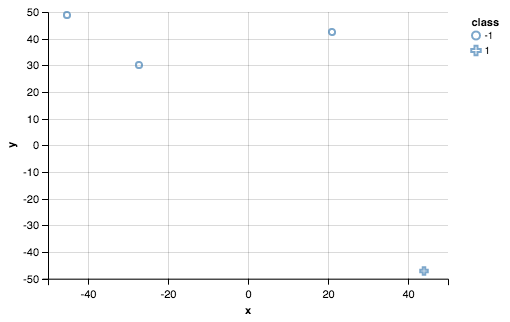

In [60]:
alt.Chart(training_df).mark_point().encode(
    x='x',
    y='y',
    shape="class"
)

Altair is a great graphing package for python that handles high level statistical graphing. Unfortuantely, I haven't figured out how to layer the graph with the actual dividor ($w^*$).

Now for the actual perceptron learning algo (PLA).


In [74]:
# intial guess
w_trained = np.matrix([0 for i in range(2+1)]).T

counter = 0

while True:
    counter += 1
#     if counter % 10 == 0:
#         print(counter)
    for i in range(NUMBER_OF_TRAINING):
        pass
    w_trained = w_trained + (training_x * training_y.T)
#     print(w_trained.T)
    
    if(counter > 25):
        break
training_x

matrix([[  1.        ,   1.        ,   1.        ,   1.        ],
        [ 44.03992612, -27.28329855,  20.97404926, -45.12642609],
        [-46.94230351,  30.20401184,  42.40385228,  48.90787093]])

In [77]:
w_trained = np.matrix([0 for i in range(2+1)]).T

print(np.sign(0))
for i in range(NUMBER_OF_TRAINING):
    if (training_x.T[i] * w_trained) != training_y.T[i]:
        w_trained = w_trained + 
# eachColumn in training_x.T:
#     print(eachColumn * w_trained)



0
[[0.]]
[[0.]]
[[0.]]
[[0.]]


In [83]:
training_x[2]

matrix([[-46.94230351,  30.20401184,  42.40385228,  48.90787093]])

In [ ]:
w_trained = [0 for i in range(2)]
w_trained = np.matrix([0] + w_trained).T
w_trained

In [ ]:
training_x * training_y.T